# Chapter 9. Tests on Categorical Data

- analysis of categorical data is the analysis of frequencies

- **Chi-square test** : This is the most common type. It is a hypothesis test, which checks **if the entries in the individual cells in a frequency table all come from the same distribution**


- **Fisher’s Exact Test** : While the chi-square test is approximate, the Fisher’s Exact Test is an exact test. It is computationally more expensive and intricate than the chi-square test, and was **originally used only for small sample numbers**


- **McNemar’s Test** : This is a matched pair test for 2   2 tables. For example, if you want to see if two doctors obtain comparable results when checking (the same) patients, you would use this test.


- **Cochran’s Q Test** : Cochran’s Q test is an extension to the McNemar’s test for related samples that provides a method for testing for differences between three or more matched/paired sets of frequencies or proportions. the same samples analyzed by 3 different laboratories, For example, if you have exactly and you want to check if the results are statistically equivalent, you would use this test. 

## 9.1 One Proportion

### 9.1.1 Confidence Intervals

- 신뢰구간이란 특정 확률로 parameter의 실제값(true value)이 존재할 것으로 예측되는 구간을 뜻함.

- 이를 알기위해서는 standard error와 t분포에 해당하는 값이 필요하며, 그 수식은 다음과 같음.


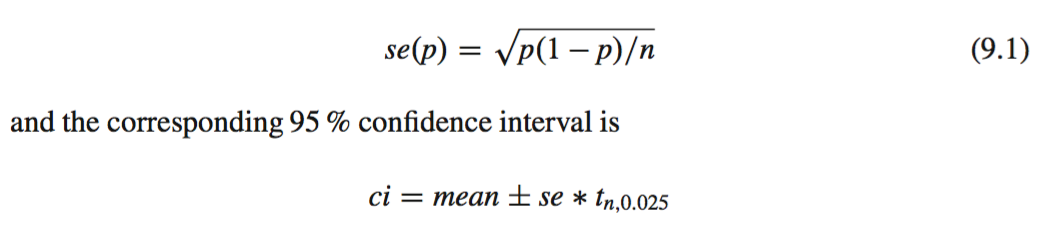

In [2]:
from IPython.display import Image
Image("./fig/CI.png")

### 9.1.2 Explanation

- 위의 설명에서 SE값을 구하기 위해서는 분산을 구해야 하며, 이항분포에서 분산은 다음과 같이 유도됨.

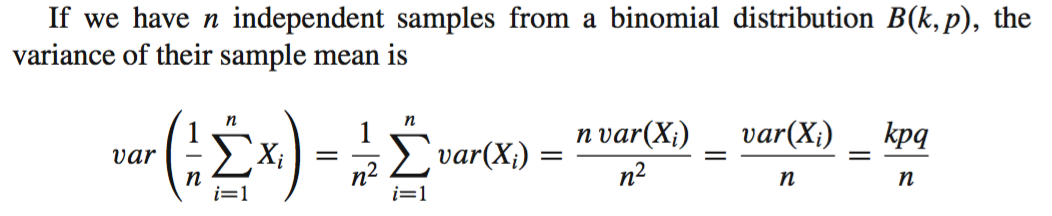

In [3]:
Image("./fig/Binomial_var.png")

### 9.1.3 Example

- Upper Austria University of Applied Sciences의 학생들에게 매년 유방암이 얼마나 많이 발생하는가? 

- 이들이 사망시에 유방암 때문에 죽을 확률은 얼마나 되는가?

> - 이 학교 학생 5000명 중 절반이 여학생임
> - 유방암은 여성에게 더 predominant하게 일어남.
> - 20~30대의 유방암 발생빈도는 10이며, 이는 매년 10만명당 발생하는 건수를 말함. 즉 매년 10만명당 10명에게서 일어남.
> - 사망하는 여성의 3.8%는 유방암이 원인임. 

- n = 2500, P(incidence) = 10/100,000 , P(mortality) = 3.8 / 100

----

## 9.2 Frequency Tables

- 카이자승검정 : 명목척도로 측정된 변인의 각 항목들이 빈도가 주어졌을 때 그 빈도 간 유의적 차이가 있는지 검증하는 방법, 기대치와 관찰치의 차이를 검증


- 카이자승검정의 목적 
> - 명목척도로 되어 있는 독립변인과 종속변인과의 차이를 검증하기 위해
> - 빈도나 비율이 영가설에 적합하지 않을 경우

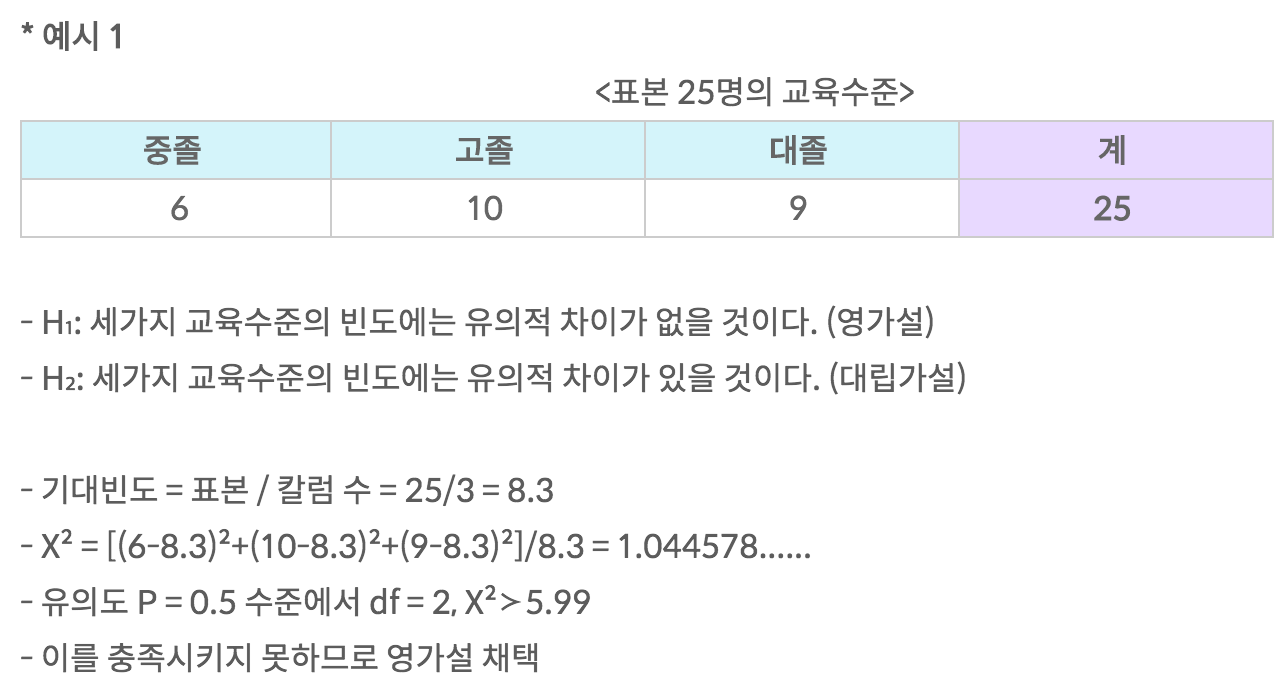

In [4]:
Image("./fig/Chi_one.png")

##### 기대 빈도 (Expected frequency)와 카이제곱 분포

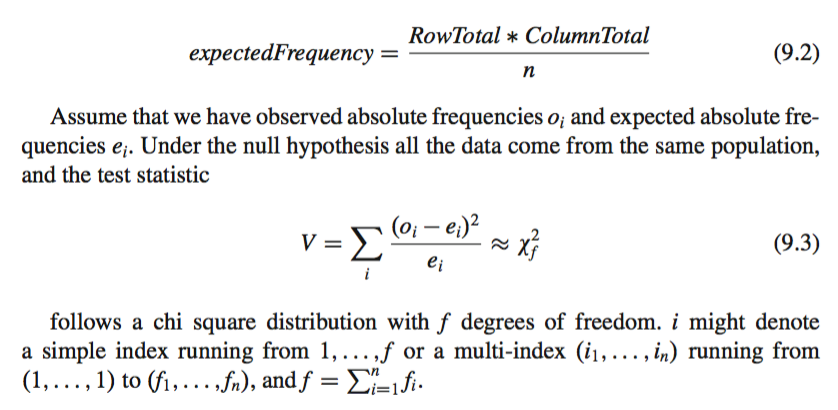

In [5]:
Image("./fig/Chi_ef_chidist.png")

### 9.2.1 One-Way Chi-Square Test

- For example, assume that you go hiking with your friends. Every evening, you draw lots who has to do the washing up. But at the end of the trip, you seem to have done most of the work:

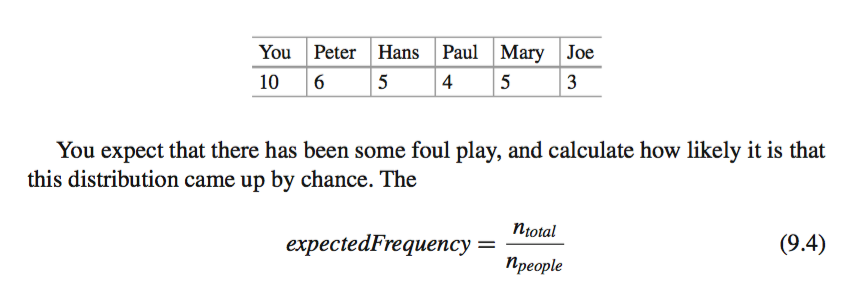

In [9]:
Image("./fig/oneway_chisquare.png")

In [7]:
import numpy as np
from scipy import stats

data = np.array([10, 6, 5, 4, 5, 3])
V, p = stats.chisquare(data)

In [8]:
print(p)

0.373130385949


In [10]:
print(V)

5.36363636364


### 9.2.2 Chi-Square Contingency Test

- contingency test : When **data can be arranged in rows and columns**, we can check if the numbers in the individual columns are contingent on the row value

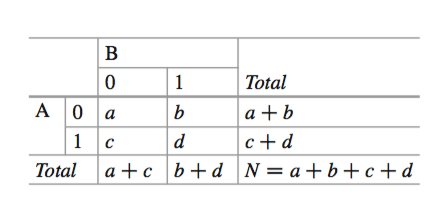

In [11]:
Image("./fig/contingent_test_table.png")

#### a) Assumptions

- 각 셀의 기대빈도는 1 이상
- 기대빈도가 5이상 되는 셀이 전체 셀의 80% 이상 (불만족시, Fisher's exact test)
- 샘플사이즈가 충분하지 않을 때, Yates correction을 통한 보정.
- Yates 검정통계량 ː SUM{ [ ( |실제빈도-기대빈도| - 0.5 )^2 ] / 기대빈도 }


#### b) Degrees of Freedom

- r x c의 table에서 자유도 df는 다음과 같음
> - df = (r - 1) * (c - 1)

#### c) Example 1

- Comparison of number of hours swimming by swimmers with or without erosion of dental enamel:
    
    > 6시간 이상 : 32 yes, 118 no
    
    > 6시간 미만: 17 yes, 127 no

In [14]:
import numpy as np
from scipy import stats

data = np.array([[32, 118], [17, 127]])

chi2_yates = stats.chi2_contingency(data, correction = True)
chi2_noyates = stats.chi2_contingency(data, correction = False)

In [16]:
print(chi2_yates) # Chi_distribution, p_value, df, expected value

(4.1405000000000003, 0.041868800731134873, 1, array([[  25.,  125.],
       [  24.,  120.]]))


In [17]:
print(chi2_noyates)

(4.8019999999999996, 0.028426718949041266, 1, array([[  25.,  125.],
       [  24.,  120.]]))


### 9.2.3 Fisher’s Exact Test

- 기대빈도가 5 미만인 셀이 전체 셀의 20% 이상일때 FET를 함.
- 대략 10~15개의 셀을 가진 테이블에 적합.
- H0 : 두 집단의 odds ratio 차이가 없다.
- 분석 시, one-tailed 또는 two-tailed test 선택해야 함.

http://blog.naver.com/gksshdk8003/220337708973
    

#### a) Example: “A Lady Tasting Tea”

- 영국의 저명한 통계학자인 R. A. Fisher는 Fisher의 정확검정법(Fisher's exact test)를 제안하였다.

- 피셔는 자신의 동료가 차를 마실 때 그 컵에 우유와 차 중 어느 것을 먼저 컵에 부었는지 구별할 수 있다고 주장하는 것을 통계적으로 증명하기 위해 여덟 컵의 차를 맛보는 실험을 계획하였다. 8개 중 4컵은 우유를 먼저 붓고 나머지 4컵은 차를 먼저 부었고, 이를 동료도 알고 실험에 참여하였다. 즉, 행합을 알고 실험에 참여하게 된것이다. 

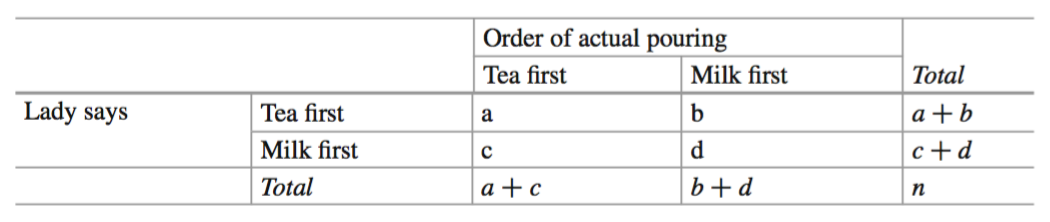

In [18]:
Image("./fig/Fisher_tea_table.png")

- n : the total number of cups of tea made. 
- The number of cups where tea is poured first is a + c and the lady classifies a + b of them as tea first.

- 피셔 정확검정법은 초기하분포를 따르며, 성공 횟수에 따른 확률은 다음 예제 처럼 구할 수 있다. 

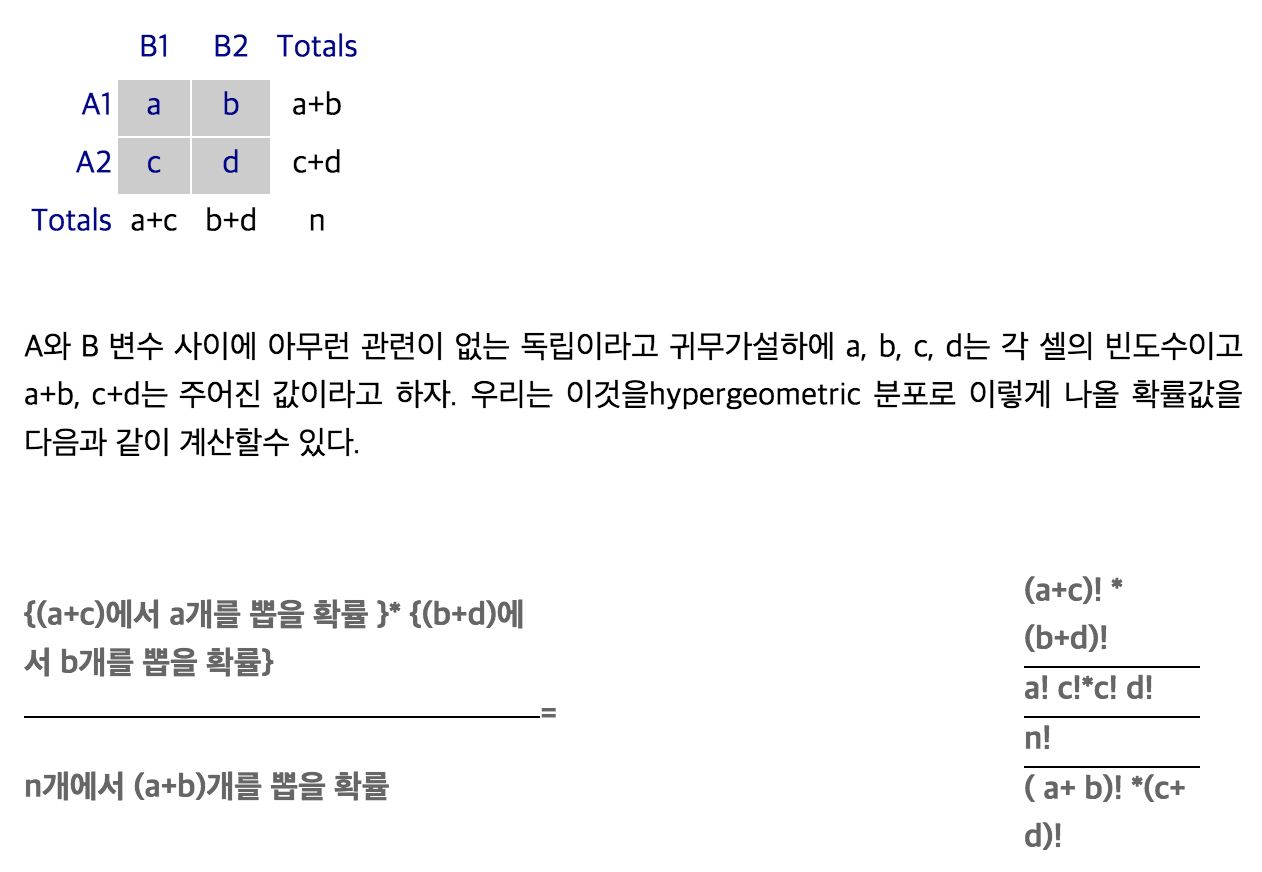

In [20]:
Image("./fig/Fisher_example_table.png")

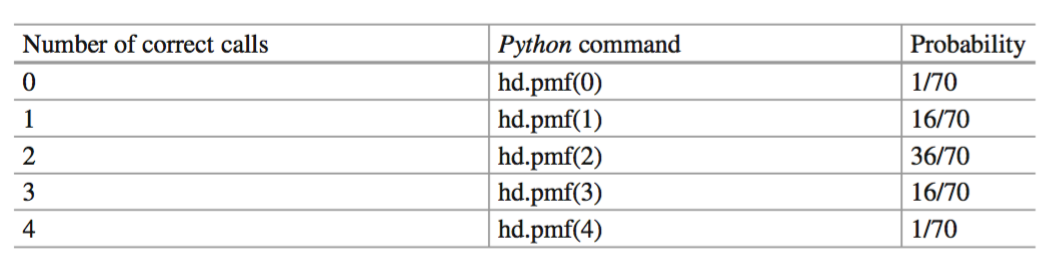

In [21]:
Image("./fig/Fisher_example_table2.png")

#### b) Example: 소년범죄와 안경착용의 상관성

- Spectecle wearers: 1 delinquent, 5 non-delinquents

- non-spectacle wearers: 8 delinquents, 2 non-delinquents

In [22]:
import numpy as np
from scipy import stats

data = np.array([[1, 5], [8, 2]])
fisher_result = stats.fisher_exact(data)

In [23]:
print(fisher_result) # odds ratio, p-value

(0.050000000000000003, 0.034965034965034919)


### 9.2.4 McNemar’s Test

- 이전(before), 이후(after)에 대해 명목변수로 측정한 다음 이전(before)과 이후(after)에 차이가 있는 지에 대한 검정을 하기 위해 사용할 수 있는데 paired sample에 대한 가설검정임. 이는 크기가 (2*2)인 contingency table에 해당함.

- H0 = 특정 사건 후 변화가 없음


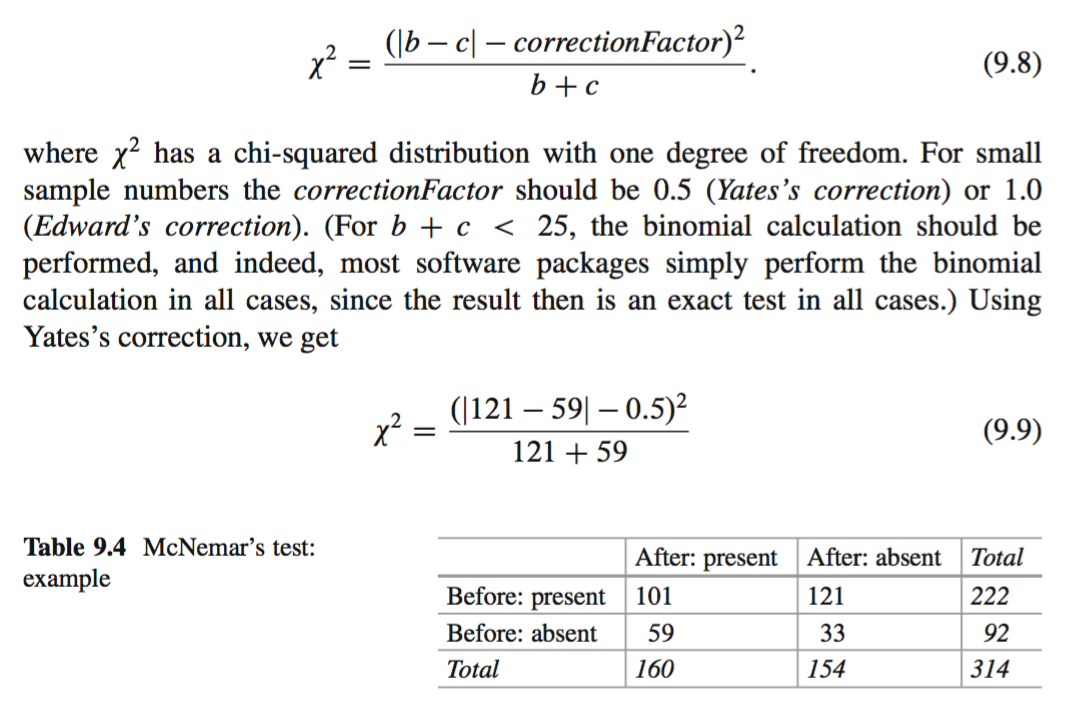

In [24]:
Image("./fig/Mcnemar_table.png")

In [26]:
import numpy as np
from statsmodels.sandbox.stats.runs import mcnemar

f_obs = np.array([[101, 121], [59, 33]])
print(mcnemar(f_obs)) # 검정통계량 , p_val

(59, 4.4344492637555101e-06)


### 9.2.5 Cochran’s Q Test

- hypothesis test where the response variable can take only two possible outcomes (coded as 0 and 1). 

- It is a nonparametric statistical test to verify if k treatments have identical effects

#### a) Example

In [28]:
from statsmodels.sandbox.stats.runs import cochrans_q
import pandas as pd

tasks = np.array([[0,1,1,0,1,0,0,1,0,0,0,0],
                  [1,1,1,0,0,1,0,1,1,1,1,1],
                  [0,0,1,0,0,1,0,0,0,0,0,0]])

df = pd.DataFrame(tasks.T, columns = ['Task1', 'Task2', 'Task3'])
df

,Task1,Task2,Task3
0,0,1,0
1,1,1,0
2,1,1,1
3,0,0,0
4,1,0,0
5,0,1,1
6,0,0,0
7,1,1,0
8,0,1,0
9,0,1,0


In [29]:
cochrans_q(df) # Q_val, P_val

(8.6666666666666661, 0.013123728736940971)

#### - At least one of the three tasks is easier or harder than the others.
